In [27]:
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import wordcloud
from langdetect import detect_langs
import pandas as pd
from  sklearn.feature_extraction.text import CountVectorizer
import sys
import html

import warnings
warnings.filterwarnings("ignore")

----

In [8]:
tweets_bitcoin = pd.read_csv("bitcoin_tweets_old.csv")

In [11]:
tweets_bitcoin.columns

Index(['url', 'date', 'content', 'renderedContent', 'id', 'user', 'replyCount',
       'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang',
       'source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags'],
      dtype='object')

In [14]:
tweets_bitcoin = tweets_bitcoin[tweets_bitcoin['lang']=='en']

In [15]:
tweets_bitcoin[["date","content"]]

,date,content
0,2022-02-26 13:17:10+00:00,"Bitcoin gained +9.5% overnight to $38,558.00 b..."
1,2022-02-26 12:05:02+00:00,@theloudestno @BTC_Archive China just banned B...
2,2022-02-26 11:06:01+00:00,"No one knows how low the indexes will go, but ..."
3,2022-02-26 06:25:37+00:00,“Governments will buy Bitcoin when it is 10 ti...
4,2022-02-26 03:00:59+00:00,"Wow, this expert had made a forecast that bitc..."
...,...,...
9849,2014-01-15 10:29:03+00:00,Near Future of Bitcoin: What can you expect fr...
9850,2014-01-15 10:29:03+00:00,Near Future of Bitcoin: What can you expect fr...
9851,2014-01-11 06:22:38+00:00,@Newegg is #bitcoin in the near future? I have...
9852,2014-01-09 15:07:28+00:00,Five Lessons From Bitcoin: is it near collapse...


In [16]:
tt_btc = tweets_bitcoin[["date","content"]]

In [26]:
tt_btc['date'] = pd.to_datetime(tt_btc['date'])

In [28]:
#cleaning th text

tt_btc['text'] = tt_btc['content'].copy()

tt_btc['text'] = tt_btc['text'].apply(lambda x :  html.unescape(x)) # decode html

tt_btc['text'] = tt_btc['text'].apply(lambda x :  re.sub(r'@[A-Za-z0-9]+','',x)) # removing mentions @

tt_btc['text'] = tt_btc['text'].apply(lambda x :  re.sub('https?://[A-Za-z0-9./]+','',x)) # retirando URLs

In [ ]:
#nltk.download('vader_lexicon')

In [34]:
sid = SentimentIntensityAnalyzer()
tt_btc['polarity_scores'] = tt_btc['text'].apply(sid.polarity_scores)

In [37]:
tt_btc['compound_polarity_scores'] = tt_btc['polarity_scores'].apply(lambda x: x['compound'])

In [38]:
tt_btc.head()

,date,content,text,polarity_scores,compound_polarity_scores
0,2022-02-26 13:17:10+00:00,"Bitcoin gained +9.5% overnight to $38,558.00 b...","Bitcoin gained +9.5% overnight to $38,558.00 b...","{'neg': 0.047, 'neu': 0.826, 'pos': 0.127, 'co...",0.5859
1,2022-02-26 12:05:02+00:00,@theloudestno @BTC_Archive China just banned B...,_Archive China just banned Bitcoin transactio...,"{'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'comp...",-0.4588
2,2022-02-26 11:06:01+00:00,"No one knows how low the indexes will go, but ...","No one knows how low the indexes will go, but ...","{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'comp...",-0.5859
3,2022-02-26 06:25:37+00:00,“Governments will buy Bitcoin when it is 10 ti...,“Governments will buy Bitcoin when it is 10 ti...,"{'neg': 0.054, 'neu': 0.946, 'pos': 0.0, 'comp...",-0.2732
4,2022-02-26 03:00:59+00:00,"Wow, this expert had made a forecast that bitc...","Wow, this expert had made a forecast that bitc...","{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",0.7840


In [39]:
tt_btc.set_index('date',inplace=True)

<AxesSubplot:xlabel='date'>

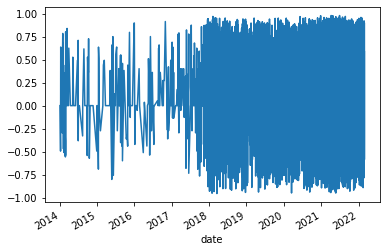

In [48]:
tt_btc['compound_polarity_scores'].plot()

<AxesSubplot:xlabel='date'>

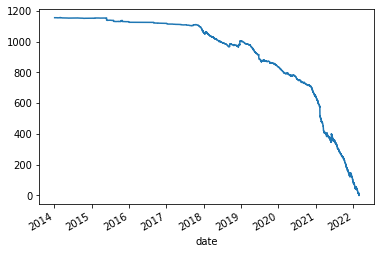

In [45]:
tt_btc['compound_polarity_scores'].cumsum().plot()

<AxesSubplot:xlabel='date'>

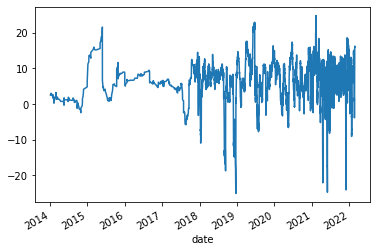

In [47]:
tt_btc['compound_polarity_scores'].rolling(50).sum().plot()

<AxesSubplot:xlabel='date'>

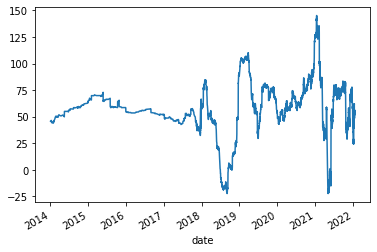

In [50]:
tt_btc['compound_polarity_scores'].rolling(500).sum().plot()

<AxesSubplot:xlabel='date'>

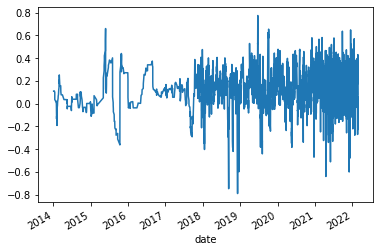

In [53]:
tt_btc['compound_polarity_scores'].rolling(15).mean().plot()